# Prova a caso regressione logistica

Per prima cosa iniziamo a importare un po' di pacchetti che ci servono.

In [1]:
from tqdm import tqdm

import numpy as np
np.random.seed(0)  # keep the random seed of numpy fixed

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Configure matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Vediamo di importare il codice che abbiamo usato a lezione per creare un controesempio. L'idea è quella di creare un dataset che contenga dati che non possono essere linearmente separati. Proviamo a usare ChatGPT per cercare un modello che non sia lineare (in teoria posso usare anche il make moons che avevamo nell'ultimo assignment).

In [2]:
from sklearn.datasets import make_circles

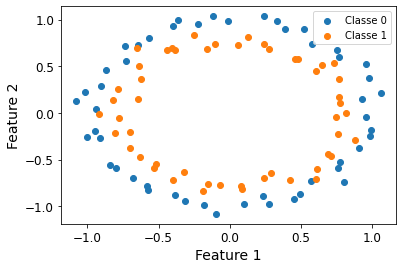

In [3]:
X, y = make_circles(n_samples=100, noise=0.05, random_state=42)

# Visualizzare il dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

A questo punto l'idea è di vedere come creando la regressione logistica questa non funzioni. L'idea sarebbe quella di dividere il nostro dataset in alcuni training data e alcuni validation data. Possiamo farlo tranquillamente.

In [4]:
logreg = LogisticRegression(penalty = None)

# Forse qua andrebbero scalate le cose con uno StandardScaler?

# Qua possiamo fittare i nostri dati
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
logreg.fit(X_train, y_train)

LogisticRegression(penalty=None)

A questo punto abbiamo fittato il nostro modello logistico: proviamo quindi a vedere come si comporta. Per iniziare settiamo il decision boundary a 0.5 come nel classificatore Bayesiano base.

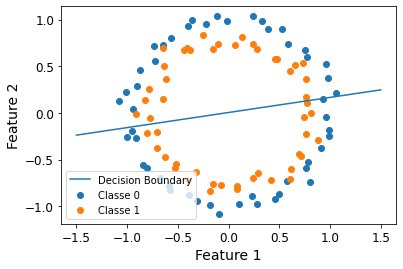

[[ 0.0252951  -0.15633372]]
[0.00062146]


In [5]:
# Mettiamo alpha il valore della soglia
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 1.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg.intercept_[0] - logreg.coef_[0, 0]*z_x[:]) / (logreg.coef_[0,1])

plt.figure()
plt.plot(z_x, z_y, label = "Decision Boundary")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.show()

print(logreg.coef_)
print(logreg.intercept_)

Chiaramente dall'esempio sopra si vede che non funziona. In teoria dovrebbe funzionare se usassimo un kernel non lineare. Sarebbe magari da provare ad aggiustare (**provalo prima o poi magari devi aggiungere x^2 come predictor non dovrebbe essere impossibile**). Vediamo di provare a farlo.

In [6]:
def make_plot(X, y, model=None, title=None):
    _, ax = plt.subplots()  # we need `ax` for `DecisionBoundaryDisplay`
    
    if model is not None:
        common_params = {"estimator": model, "X": X, "ax": ax, "grid_resolution": 200, "eps": 0.2}
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["r", "r", "r"],
            linestyles=["--", "-", "--"],
        )
        
    if title is not None:
        ax.set_title(title)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=35, edgecolor="k")
    ax.set_aspect('equal')
    
    plt.plot()

In [7]:
# Per prima cosa creo il valore x**2

X1 = np.insert(X, 2, 0, axis = 1)
X1 = np.insert(X1, 3, 0, axis = 1)
X1 = np.insert(X1, 4, 0, axis = 1)

# Nella terza metto x^2
X1[:, 2] = (X1[:, 0])**2

# Nella quarta metto y^2
X1[:, 3] = (X1[:, 1])**2

# Nella quinta metto xy
X1[:, 4] = (X1[:, 0])*(X1[:, 1])

#print(X1)

# A questo punto creo una regressione logistica su questi parametri
logreg1 = LogisticRegression(penalty = None)
logreg1.fit(X1, y)

# Ora proviamo a plottare il nuovo decision boundary
# L'idea è anche giusta ma non saprei come plottarlo su pyplot


LogisticRegression(penalty=None)

[[  0.65855692   0.9699664  -45.15481005 -46.54122849  -2.30212227]]
[38.71160881]


C:\Users\Daniele\AppData\Local\Temp\ipykernel_3204\2480064574.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, y1, equation, levels=[0], colors='r', label='DB with a = 0.3')
C:\Users\Daniele\AppData\Local\Temp\ipykernel_3204\2480064574.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, y1, equation, levels=[0], colors='g', label='DB with a = 0.8')


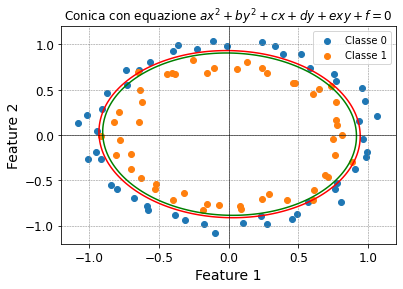

In [8]:
print(logreg1.coef_)
print(logreg1.intercept_)

# Cerco i coefficienti
a = logreg1.coef_[0,0]
b = logreg1.coef_[0,1]
c = logreg1.coef_[0,2]
d = logreg1.coef_[0,3]
e = logreg1.coef_[0,4]
f = logreg1.intercept_[0]

# Mettiamo alpha il valore della soglia

alpha = 0.3
log_a = np.log((alpha) /  (1 -alpha))


# Crea una griglia di punti
x1 = np.linspace(-1.2, 1.2, 400)
y1 = np.linspace(-1.2, 1.2, 400)
x1, y1 = np.meshgrid(x1, y1)

# Calcola l'equazione della conica
equation = a * x1 + b * y1 + c * x1**2 + d * y1**2 + e * x1 * y1 + f - log_a

# Disegna la conica
plt.contour(x1, y1, equation, levels=[0], colors='r', label='DB with a = 0.3')

# Cambiamo il valore di alpha
alpha = 0.8
log_a = np.log((alpha) /  (1 -alpha))

# Calcola l'equazione della conica
equation = a * x1 + b * y1 + c * x1**2 + d * y1**2 + e * x1 * y1 + f - log_a

# Disegna la conica
plt.contour(x1, y1, equation, levels=[0], colors='g', label='DB with a = 0.8')
#plt.legend()

# Imposta l'aspetto del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conica con equazione $ax^2 + by^2 + cx + dy + exy + f = 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

#plt.figure()
#plt.plot(z_x, z_y, label = "Decision Boundary")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.legend()
plt.legend()
plt.show()


Possiamo provare con un altro dataset per vedere che non funziona, ad esempio con il two moon dell'assignment che ci hanno dato a Machine Learning a Utrecht.

In [9]:
from sklearn.datasets import make_moons

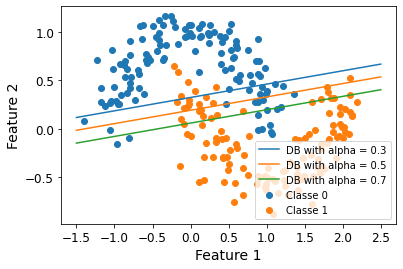

In [10]:
X_moon, y_moon = make_moons(n_samples=250, noise=0.15, random_state=0)

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, train_size = 0.7)
logreg_moon = LogisticRegression(penalty = None).fit(X_train_moon, y_train_moon)

plt.figure()

# Mettiamo alpha il valore della soglia
alpha = 0.3
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 2.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_moon.intercept_[0] - logreg_moon.coef_[0, 0]*z_x[:]) / (logreg_moon.coef_[0,1])
plt.plot(z_x, z_y, label = "DB with alpha = 0.3")

# Proviamo a scegliere un altro livello di soglia

alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 2.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_moon.intercept_[0] - logreg_moon.coef_[0, 0]*z_x[:]) / (logreg_moon.coef_[0,1])
plt.plot(z_x, z_y, label = "DB with alpha = 0.5")

# Proviamone un ultimo
alpha = 0.7
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 2.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_moon.intercept_[0] - logreg_moon.coef_[0, 0]*z_x[:]) / (logreg_moon.coef_[0,1])
plt.plot(z_x, z_y, label = "DB with alpha = 0.7")


# Ora plottiamo i vari grafici del dataset

plt.scatter(X_moon[y_moon == 0][:, 0], X_moon[y_moon == 0][:, 1], label="Classe 0")
plt.scatter(X_moon[y_moon == 1][:, 0], X_moon[y_moon == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.show()

C:\Users\Daniele\AppData\Local\Temp\ipykernel_3204\3439562259.py:36: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')


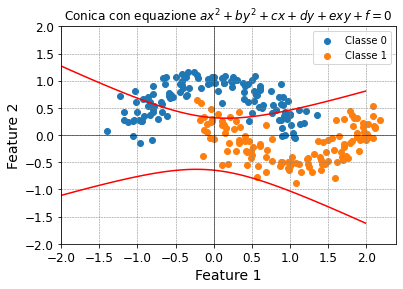

In [11]:
# Aggiungiamo anche qua le colonne con i quadrati

X1_moon = np.insert(X_moon, 2, 0, axis = 1)
X1_moon = np.insert(X1_moon, 3, 0, axis = 1)
X1_moon = np.insert(X1_moon, 4, 0, axis = 1)

# Nella terza metto x^2
X1_moon[:, 2] = (X1_moon[:, 0])**2

# Nella quarta metto y^2
X1_moon[:, 3] = (X1_moon[:, 1])**2

# Nella quinta metto xy
X1_moon[:, 4] = (X1_moon[:, 0])*(X1_moon[:, 1])

# Ora fitto il nuovo metodo
logreg_moon1 = LogisticRegression(penalty = None).fit(X1_moon, y_moon)

# Coefficienti dell'equazione ax^2 + by^2 + cx + dy + exy + f = 0
a = logreg_moon1.coef_[0,0]
b = logreg_moon1.coef_[0,1]
c = logreg_moon1.coef_[0,2]
d = logreg_moon1.coef_[0,3]
e = logreg_moon1.coef_[0,4]
f = logreg_moon1.intercept_[0]

# Crea una griglia di punti
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)

# Calcola l'equazione della conica
equation = a * x**2 + b * y**2 + c * x + d * y + e * x * y + f

# Disegna la conica
plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')

# Imposta l'aspetto del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conica con equazione $ax^2 + by^2 + cx + dy + exy + f = 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.scatter(X_moon[y_moon == 0][:, 0], X_moon[y_moon == 0][:, 1], label="Classe 0")
plt.scatter(X_moon[y_moon == 1][:, 0], X_moon[y_moon == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In questo caso non pare funzionare molto bene la cosa.

C:\Users\Daniele\AppData\Local\Temp\ipykernel_3204\899045039.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


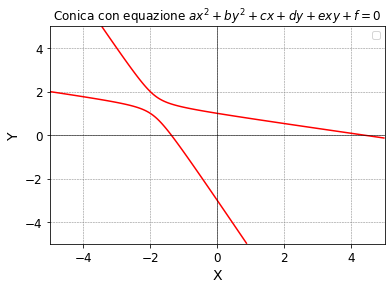

In [12]:
# Coefficienti dell'equazione ax^2 + by^2 + cx + dy + exy + f = 0
a, b, c, d, e, f = 1, 2, -3, 4, 5, -6

# Crea una griglia di punti
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

# Calcola l'equazione della conica
equation = a * x**2 + b * y**2 + c * x + d * y + e * x * y + f

# Disegna la conica
plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')

# Imposta l'aspetto del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conica con equazione $ax^2 + by^2 + cx + dy + exy + f = 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# Prova codice mio
Vediamo ora di provare a implementare un mio codice usando quello proposto da ESL.

In [13]:
def LogisticRegressionMia(data, labels, n_iter = 100):
    
    # Inizialmente proviamo a fissare beta = 0
    beta = np.zeros(len(data[0, :]))
    #print(beta)
    
    # Poi dobbiamo creare il vettore di fitted probabilities p
    p = np.ones(len(labels))
    diagonale = np.zeros(len(labels))
    
    # Ora dobbiamo ripetere queste operazione
    for n in range(n_iter):
        
        # Usiamo i cicli for e poi vediamo di passare allo slicing
        for i in range(len(labels)):
            h = beta @ data[i, :]
            elemento = ((np.e)**h) / (1+(np.e)**h)
            #print(elemento)
            #print(np.e**h / (1+np.e**h))
            p[i] = elemento
            #print(p[i])
            diagonale[i] = p[i]*(1 - p[i])
        
        #diagonale[:] = p[:]*(1 - p[:])
            
        #print(p)

        # Ora creiamo la matrice W: questa è una prima implementazione grezza,
        # vedi coem creare le matrici diagonali
        W = np.diagflat(diagonale)
        #print(W)

        # A questo punto definisco il vettore z
        W_inv = np.linalg.inv(W)
        z = np.dot(data, beta) + np.dot(W_inv, labels-p)

        # Ora calcolo il nuovo b
        a = np.dot(data.T, W)
        c = np.dot(a, data)
        d = np.linalg.inv(c)
        f = np.dot(data.T, W)
        g = np.dot(d, f)
        beta = np.dot(g, z)
        
    return beta

In [14]:
# Proviamo a fittare e a vedere cosa esce

# Usiamo il primo dataset quello dei cerchi
X, y = make_circles(n_samples=100, noise=0.05, random_state=42)

X2 = np.insert(X, 0, 1, axis = 1)
#print(X2)
beta = LogisticRegressionMia(data = X2, labels = y, n_iter = 10000)
print(beta)

[-2.06441571e-05  1.80025682e-02  1.13186825e-02]


Non vorrei che fosse un problema legato al fatto che in teoria non funziona bene con questo dataset. Non è che magari è da provare un altro dataset su cui funziona effettivamente la logistic regression? Prova a cercarne uno più tardi.

In [15]:
# Proviamo con il due moon dataset
X_moon, y_moon = make_moons(n_samples=250, noise=0.15, random_state=0)

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, train_size = 0.7)
logreg.fit(X_train_moon, y_train_moon)

X3 = np.insert(X_moon, 0, 1, axis = 1)
beta3 = LogisticRegressionMia(X3, y_moon, n_iter = 5000)
print(beta3)

print(logreg.coef_)
print(logreg.intercept_)

[ 1.00408222  0.99747851 -5.91009164]
[[ 1.02268667 -6.01774602]]
[1.26760128]


Tutto sommato non esce male come risultato, è solo un po' lento. Aumentando il numero di iterazioni migliora, ma è veramente molto lento.

In [16]:
from sklearn import datasets

iris = datasets.load_iris()
#print(iris.DESCR)
X_iris, y_iris = iris.data, iris.target

In [17]:
# Prendiamo solo due categorie

X_iris1 = iris["data"][:, (2, 3)]  # petal length, petal width
y_iris1 = (iris["target"] == 2).astype(int)  # make problem binary: 1 if Iris virginica, else 0
print(y_iris1)

X4 = np.insert(X_iris1, 0, 1, axis = 1)
#print(X4)
beta4 = LogisticRegressionMia(X4, y_iris1, n_iter = 30000)
print(beta4)

logreg_iris = LogisticRegression().fit(X_iris1, y_iris1)
print(logreg_iris.coef_)
print(logreg_iris.intercept_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[-45.27234377   5.75453232  10.44669989]
[[2.77762524 2.38552012]]
[-17.5481106]


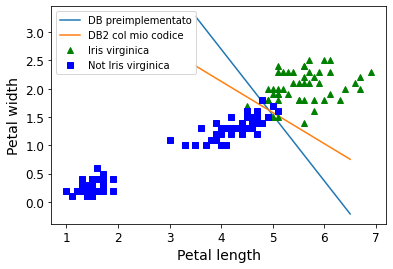

In [18]:
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(3.5, 6.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_iris.intercept_[0] - logreg_iris.coef_[0, 0]*z_x[:]) / (logreg_iris.coef_[0,1])

z_y1  = (log_a - beta4[0] - beta4[1]*z_x[:]) / beta4[2]


plt.figure()
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y1, label = "DB2 col mio codice")
plt.plot(X_iris1[:, 0][y_iris1 == 1], X_iris1[:, 1][y_iris1 == 1], "g^", label="Iris virginica")
plt.plot(X_iris1[:, 0][y_iris1 == 0], X_iris1[:, 1][y_iris1 == 0], "bs", label="Not Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

Il piano non coincide più di tanto, ma alla fine qualcosa di ragionevole si vede (sembrano abbastanza simili).

In [19]:
from sklearn.datasets import load_wine
wine = load_wine()

In [20]:
wine_usare = wine["target"]
wine_x = wine["data"][:, (3, 4)]
#wine_x_usare = wine_x[]

In [21]:
#print(wine_x)

In [22]:
wine_usare1 = (wine_usare == 0).astype(int)

In [23]:
#wine_usare1

In [24]:
X_wine = np.insert(wine_x, 0, 1, axis = 1)
beta5 = LogisticRegressionMia(X_wine, wine_usare1, n_iter = 10000)
print(beta5)

logreg_wine = LogisticRegression().fit(wine_x, wine_usare1)
print(logreg_wine.coef_)
print(logreg_wine.intercept_)

[ 2.75956313 -0.50248291  0.05929248]
[[-0.4985305   0.05918656]]
[2.69763764]


Proviamo ora a verificare graficamente siano separabili tramite un iperpiano non vorrei fosse questo a creare problemi.

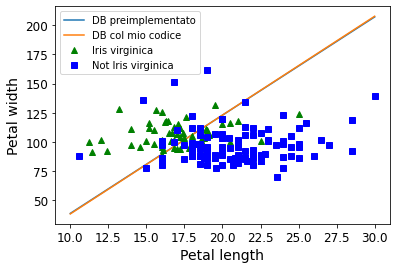

In [25]:
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(10, 30, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_wine.intercept_[0] - logreg_wine.coef_[0, 0]*z_x[:]) / (logreg_wine.coef_[0,1])

z_y1  = (log_a - beta5[0] - beta5[1]*z_x[:]) / beta5[2]

plt.figure()
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y1, label = "DB col mio codice")
plt.plot(wine_x[:, 0][wine_usare1 == 1], wine_x[:, 1][wine_usare1 == 1], "g^", label="Iris virginica")
plt.plot(wine_x[:, 0][wine_usare1 == 0], wine_x[:, 1][wine_usare1 == 0], "bs", label="Not Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

Direi che sembrano molto simili i due piani, sono quasi lo stesso. L'unica cosa il metodo lineare non funziona molto bene in questo caso.

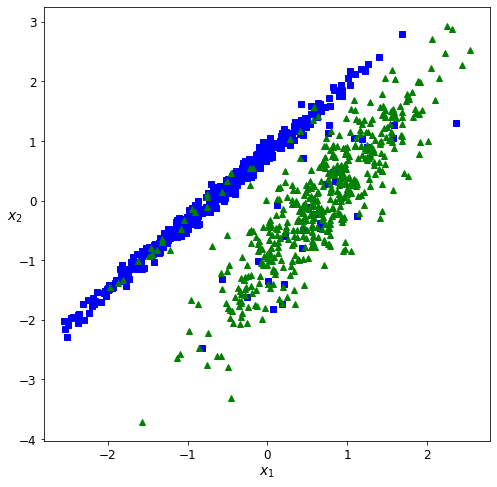

In [35]:
X_cluster, y_cluster = datasets.make_classification(n_samples=1000,
                                                    n_features=2,
                                                    n_redundant=0,
                                                    n_informative=2,
                                                    n_repeated=0,
                                                    n_clusters_per_class=1,
                                                    flip_y=0.1,
                                                    random_state=15,
                                                    )
# scale the data
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

plt.figure(figsize=(8, 8))
plt.plot(X_cluster[:, 0][y_cluster == 0], X_cluster[:, 1][y_cluster == 0], "bs")
plt.plot(X_cluster[:, 0][y_cluster == 1], X_cluster[:, 1][y_cluster == 1], "g^")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
plt.show()

In [37]:
# Proviamo la logistic regression su questi dati

X_cluster1 = np.insert(X_cluster, 0, 1, axis = 1)
beta6 = LogisticRegressionMia(X_cluster1, y_cluster, n_iter = 100)
print(beta6)

logreg_cluster = LogisticRegression().fit(X_cluster, y_cluster)
print(logreg_cluster.coef_)
print(logreg_cluster.intercept_)

[ 0.2731646   3.9522515  -2.83743259]
[[ 3.7184469  -2.63133812]]
[0.22432794]


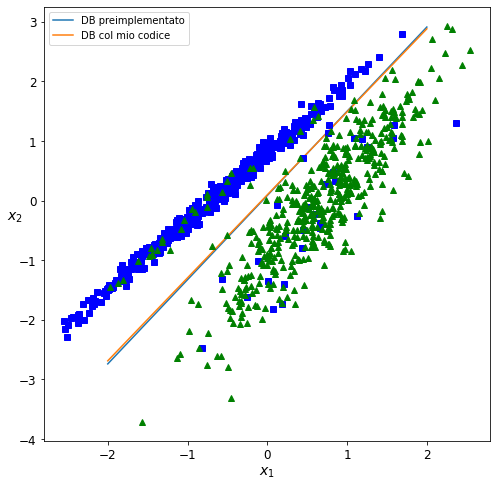

In [38]:
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-2, 2, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_cluster.intercept_[0] - logreg_cluster.coef_[0, 0]*z_x[:]) / (logreg_cluster.coef_[0,1])

z_y1  = (log_a - beta6[0] - beta6[1]*z_x[:]) / beta6[2]

plt.figure(figsize=(8, 8))
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y1, label = "DB col mio codice")
plt.plot(X_cluster[:, 0][y_cluster == 0], X_cluster[:, 1][y_cluster == 0], "bs")
plt.plot(X_cluster[:, 0][y_cluster == 1], X_cluster[:, 1][y_cluster == 1], "g^")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
plt.legend(loc = 'best', fontsize = 10)
plt.show()

Direi quasi ottimo qua, molto bene. Vedi un po' come funziona la funzione make_classification sopra (studiane i parametri).

## Prova con QDA ed LDA
Proviamo ad eseguire il codice con QDA e LDA. All'inizio lavoriamo in modo grezzo al tutto. Importiamo per prima cosa le librerie necessarie a fare il tutto. Lavoriamo con Gaussian Naive Bayes ad esempio. Proviamo a implementarlo su qualche dataset che abbiamo utilizzato finora, poi ne cercheremo di migliori.

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.naive_bayes import GaussianNB as GNB

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, train_size = 0.7)
#print(y_train)
#print(y_cluster)
LDA_cluster = LDA().fit(X_train, y_train)
QDA_cluster = QDA().fit(X_train, y_train)
NB_cluster = GNB().fit(X_train, y_train)
LR_cluster = LogisticRegression(penalty=None).fit(X_train, y_train)

In [89]:
y_pred_lda = LDA_cluster.predict(X_test)
y_pred_qda = QDA_cluster.predict(X_test)
y_pred_nb = NB_cluster.predict(X_test)
y_pred_lr = LR_cluster.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test, y_pred_lda)

0.9433333333333334

In [92]:
accuracy_score(y_test, y_pred_qda)

0.9466666666666667

In [93]:
accuracy_score(y_test, y_pred_nb)

0.8433333333333334

In [94]:
accuracy_score(y_test, y_pred_lr)

0.9466666666666667

Funziona malino il naive Bayes in questo caso.

Proviamo ora un altro dataset, tipo le due lune. Però aumentiamo il numero di osservazioni.

In [79]:
X_moon, y_moon = make_moons(n_samples=1000, noise=0.15, random_state=0)

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_cluster, y_cluster, train_size = 0.7)
#print(y_train)
#print(y_cluster)
LDA_moon = LDA().fit(X_train_moon, y_train_moon)
QDA_moon = QDA().fit(X_train_moon, y_train_moon)
NB_moon = GNB().fit(X_train_moon, y_train_moon)
LR_moon = LogisticRegression(penalty=None).fit(X_train_moon, y_train_moon)

y_moon_lda = LDA_moon.predict(X_test_moon)
y_moon_qda = QDA_moon.predict(X_test_moon)
y_moon_nb = NB_moon.predict(X_test_moon)
y_moon_lr = LR_moon.predict(X_test_moon)

In [80]:
print(accuracy_score(y_test_moon, y_moon_lda))
print(accuracy_score(y_test_moon, y_moon_qda))
print(accuracy_score(y_test_moon, y_moon_nb))
print(accuracy_score(y_test_moon, y_moon_lr))

0.9233333333333333
0.93
0.83
0.93
